<a href="https://colab.research.google.com/github/Nayoung-young/bootcamp-python/blob/main/0704_case01_Starbucks_survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#스타벅스 이벤트 관련 고객 설문 데이터

- 스타벅스 고객들의 이벤트 관련 설문에 응답한 데이터의 일부

---
**분석 목적**
1.   고객 응답 수렴
2.   프로모션 개선방안 인사이트 제시

## Data Description

1. Profile Table
> 설문 참여한 스타벅스 회원의 개인 정보


2. Transcript Table
> 이벤트에 참여한 실제 유저들의 응답

3. Portfolio Table
> 이벤트를 운영했던 내역에 관한 정보


#_0. 라이브러리/데이터 로드

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings('ignore')

In [79]:
%%time
base_path = "/content/drive/MyDrive/dataset_2023/패스트캠퍼스/starbucks-customer-data/"

transcript = pd.read_csv(base_path+"transcript.csv").drop(columns=["Unnamed: 0"])
profile = pd.read_csv(base_path+"profile.csv").drop(columns=["Unnamed: 0"])
portfolio = pd.read_csv(base_path+"portfolio.csv").drop(columns=["Unnamed: 0"])

CPU times: user 447 ms, sys: 82.5 ms, total: 529 ms
Wall time: 617 ms


## 0.1 Transcript 데이터 확인

In [80]:
## transcript 데이터 확인
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [81]:
transcript.sample(5)

,person,event,value,time
207615,23ce738b421d4731a8f8c09dea537aea,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},504
66057,b16af11771c84527b9f6ba177f33b661,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,168
263906,1ee3e36220f5437fb0523779f9318b85,offer completed,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,582
42153,4caa9fa951a3419084570450dfd6daa3,transaction,{'amount': 16.74},102
90761,01956670cf414b309675aa73368b94a9,offer viewed,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},234


In [82]:
transcript.event.unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

In [83]:
transcript[transcript['person'] == 'fcc43e232f794e639bc3185272353566']

,person,event,value,time
63843,fcc43e232f794e639bc3185272353566,offer received,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},168
71705,fcc43e232f794e639bc3185272353566,transaction,{'amount': 11.31},174
71706,fcc43e232f794e639bc3185272353566,offer completed,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,174
85015,fcc43e232f794e639bc3185272353566,offer viewed,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},210
91893,fcc43e232f794e639bc3185272353566,transaction,{'amount': 13.55},234
94855,fcc43e232f794e639bc3185272353566,transaction,{'amount': 14.17},246
96170,fcc43e232f794e639bc3185272353566,transaction,{'amount': 8.22},252
98773,fcc43e232f794e639bc3185272353566,transaction,{'amount': 13.32},264
101287,fcc43e232f794e639bc3185272353566,transaction,{'amount': 12.62},276
105763,fcc43e232f794e639bc3185272353566,transaction,{'amount': 13.44},300


- person: 각 고객 id
- event: 해당 이벤트
- time: 얼마 시간 내에 응답을 했느냐

##0.2 profile 데이터 확인

In [84]:
## profile 데이터 확인
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [85]:
for col in profile.columns:
  msg = 'column: {:>10}\t Percent of NaN Value: {:.2f}%'.format(col, 100 * (profile[col].isnull().sum() / profile[col].shape[0]))
  print(msg)

column:     gender	 Percent of NaN Value: 12.79%
column:        age	 Percent of NaN Value: 0.00%
column:         id	 Percent of NaN Value: 0.00%
column: became_member_on	 Percent of NaN Value: 0.00%
column:     income	 Percent of NaN Value: 12.79%


In [86]:
profile.sample(5)

,gender,age,id,became_member_on,income
15651,M,38,3c3b4bfed4214419902f08ba81910bb5,20170503,71000.0
12630,NaN,118,f778f62ca6f9414782bfb35067060591,20171005,NaN
9746,F,53,759f8e1cbc6c4bd1aba03e860622ab37,20170919,77000.0
8173,M,23,bce8630e669e48f09889156ebd3aab5b,20180715,60000.0
7908,M,21,2f772790746c49409d01ccc87e05e10b,20180207,55000.0


- gender 컬럼에 결측치 존재

##0.3 porfolio 데이터 확인

In [87]:
## porfolio 데이터 확인
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [88]:
portfolio.sample(5)

,reward,channels,difficulty,duration,offer_type,id
7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9


In [89]:
portfolio[portfolio['id'] =='ae264e3637204a6fb9bb56bc8210ddfd']

,reward,channels,difficulty,duration,offer_type,id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd


# _1. 데이터 전처리

고려해야 할 부분 (우선 순위)
1. profile : gender, income에 결측치 존재
2. transcript : value가 딕셔너리 형태 (key: offer_id, amount)
3. portfolio : channels가 리스트 형태

In [90]:
profile.info() # 17000 - 14825 = 2175

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [91]:
# 결측치를 포함하는 데이터들은 어떤 데이터들인지 확인합니다.
nulls = profile[profile.isnull().any(axis = 1)]

print(nulls.age.value_counts()) # 이미 어떤 처리가 들어간 듯?
print(nulls.id.value_counts()) # 각각 모두 유니크한 id, 추가로 정보를 확인할 수 없다

118    2175
Name: age, dtype: int64
68be06ca386d4c31939f3a4f0e3dd783    1
36ca38ce449645fcacc6fe0465010d64    1
105b50604fdc47298aa592d8946b8ac5    1
cd1f2f7d93614d5ea28f27c4875be0ff    1
42636c607b97409ca9d284a8d13405ba    1
                                   ..
2bf7e519dfca407c8287f756717345b9    1
0914283b4a2948d18d7978e28f10ef1f    1
3c67bf028e684c71b3b3dca7a55522fa    1
26982ffe1e974c71bed1036e5ce0c167    1
c02b10e8752c4d8e9b73f918558531f7    1
Name: id, Length: 2175, dtype: int64


In [92]:
profile.dropna(inplace = True)
profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 694.9+ KB


#_2. Profile 데이터 분석
- 설문에 참여한 사람 중 정상적인 데이터로 판단된 데이터에 대한 분석을 수행
- 각 컬럼마다 원하는 통계량을 차은 뒤, 해당 통계량을 시각화해줄 plot을 seaborn에서 가져와 구현


In [93]:
profile.sample(5)

,gender,age,id,became_member_on,income
9829,F,83,4180446d6f81480cbc467b969b9559bc,20161114,37000.0
14621,M,79,6a3176bdc38a41b39b7c186f6b2457a9,20160518,72000.0
14663,F,77,1b38189ba6f6427ca67bf106911956f8,20180721,68000.0
11632,M,48,efb92be8083a499bbe68f5935f38cc8d,20150814,64000.0
12501,F,56,8cfb612c98eb4f288955d1ca99dcdc2e,20151018,93000.0


In [94]:
# became_member_on 컬럼을 datetime으로 바꾸기

profile.became_member_on = pd.to_datetime(profile.became_member_on.astype(str), format='%Y%m%d')
profile.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            14825 non-null  object        
 1   age               14825 non-null  int64         
 2   id                14825 non-null  object        
 3   became_member_on  14825 non-null  datetime64[ns]
 4   income            14825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 694.9+ KB


In [95]:
# transcript의 person == profile의 id 일대일대응?
transcript.person.nunique()

17000

## 2.1 성별관련 분석

In [96]:
profile.gender.value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

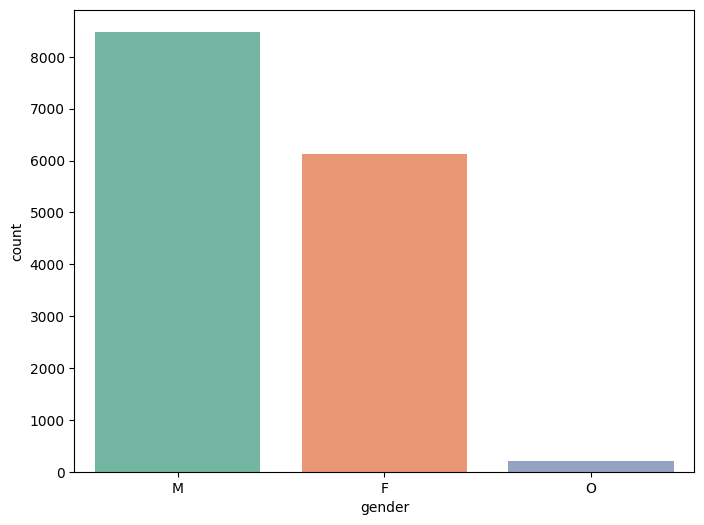

In [97]:
plt.figure(figsize = (8,6))
sns.countplot(data=profile, x ="gender", palette="Set2", order=profile.gender.value_counts().index)
plt.show()

In [98]:
pd.pivot_table(data=profile, index="gender", values ="income") # 평균적인 Female의 income이 더 높았다

,income
gender,
F,71306.412139
M,61194.601603
O,63287.735849


##2.2 나이관련 분석

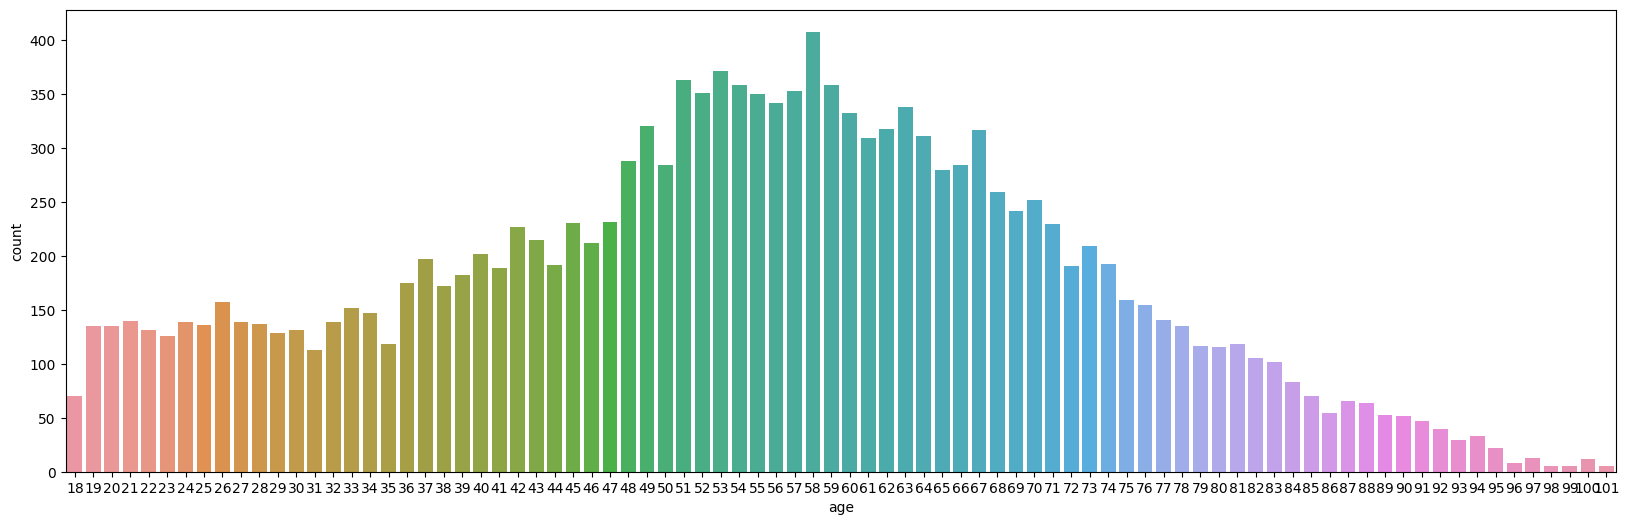

CPU times: user 1.12 s, sys: 120 ms, total: 1.24 s
Wall time: 1.14 s


In [99]:
# 먼저 countplot
%%time
plt.figure(figsize = (20, 6))
sns.countplot(data=profile, x = "age")
plt.show()

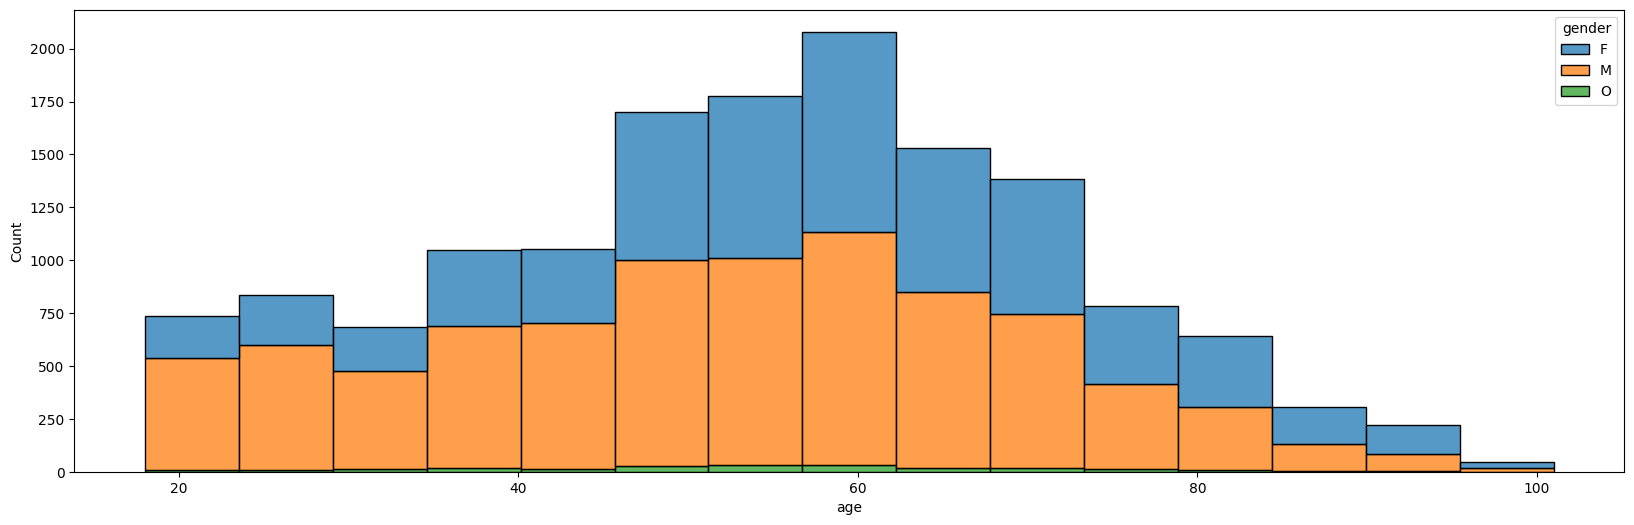

CPU times: user 444 ms, sys: 95.4 ms, total: 539 ms
Wall time: 457 ms


In [100]:
%%time
plt.figure(figsize = (20, 6))
sns.histplot(data=profile, x="age", bins = 15, hue = 'gender', multiple = 'stack')
plt.show()

In [101]:
pd.pivot_table(data=profile, index ='gender', values = ['age', 'income']) # 평균값 확인 가능

,age,income
gender,,
F,57.544950,71306.412139
M,52.116690,61194.601603
O,54.400943,63287.735849


## 2.3 회원이 된 날짜에 대한 분석

In [102]:
# 연, 월 정도

profile['join_yr'] = profile.became_member_on.dt.year
profile['join_month'] = profile.became_member_on.dt.month

profile.head()

,gender,age,id,became_member_on,income,join_yr,join_month
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,2017,5
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,2018,4
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,2018,2
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,2017,11


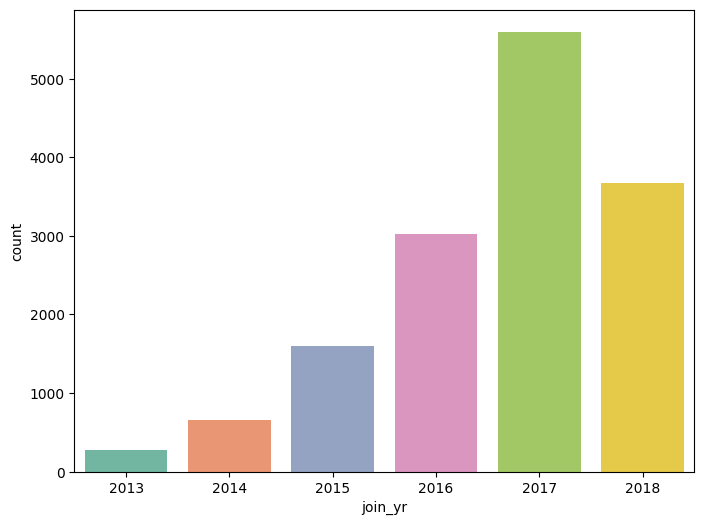

CPU times: user 215 ms, sys: 104 ms, total: 319 ms
Wall time: 204 ms


In [103]:
%%time
plt.figure(figsize = (8, 6))

sns.countplot(data = profile, x = "join_yr", palette="Set2")
plt.show()


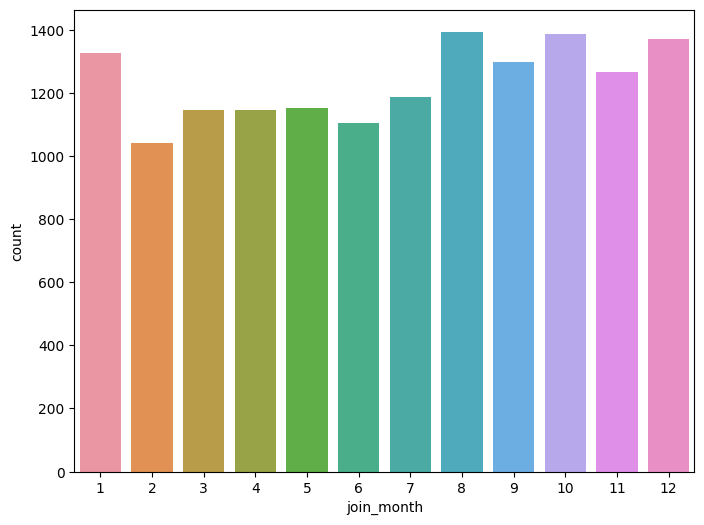

CPU times: user 251 ms, sys: 86.9 ms, total: 338 ms
Wall time: 262 ms


In [104]:
%%time
plt.figure(figsize = (8, 6))

sns.countplot(data = profile, x = "join_month")
plt.show()

In [105]:
x = profile.join_month.value_counts().index
y = profile.join_month.value_counts().values

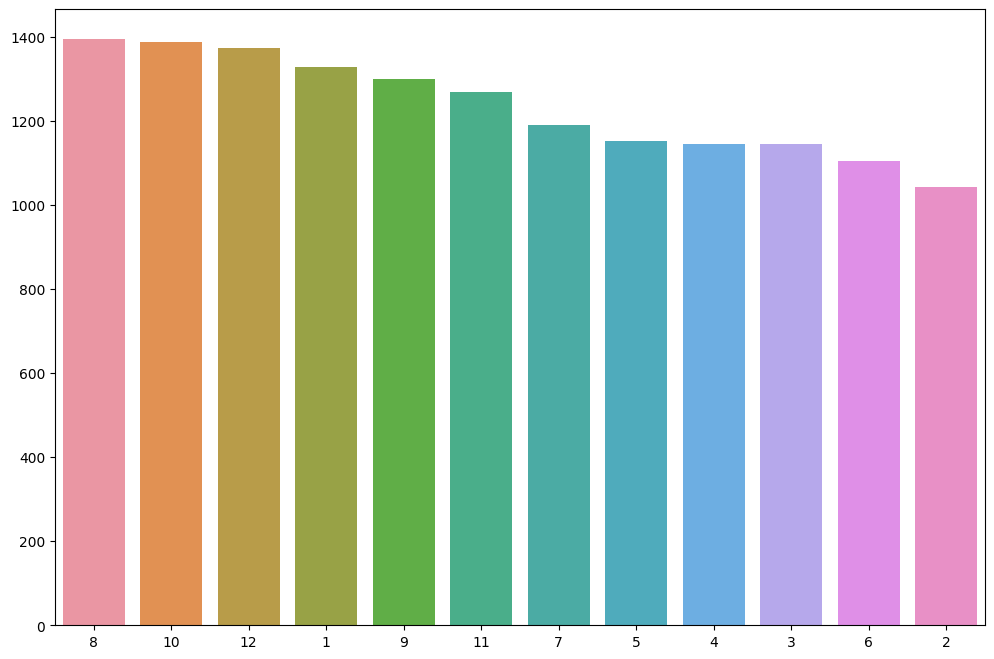

CPU times: user 261 ms, sys: 115 ms, total: 376 ms
Wall time: 264 ms


In [106]:
%%time
# 가로 막대그래프 그리기
plt.figure(figsize = (12, 8))

sns.barplot(x=x, y =y, order = x)

#sns.countplot(data = profile, y = "join_month")
plt.show()

In [107]:
profile.join_month.value_counts()

8     1395
10    1386
12    1372
1     1327
9     1299
11    1268
7     1189
5     1152
4     1145
3     1145
6     1105
2     1042
Name: join_month, dtype: int64

## 2.4 수입에 대한 분석

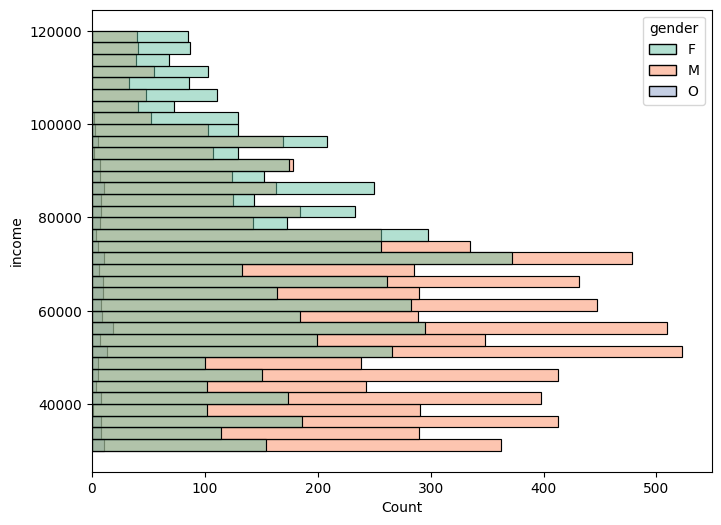

In [108]:
plt.figure(figsize = (8,6))

sns.histplot(data=profile, y ="income", palette="Set2", hue ="gender")#, multiple="stack")
plt.show()

## 2.5 profile 데이터에 대한 상관관계 분석

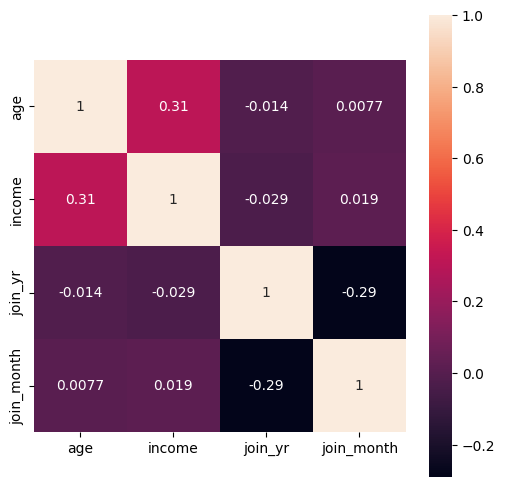

In [109]:
plt.figure(figsize = (6,6))
sns.heatmap(data=profile.corr(), square=True, annot=True)
plt.show()

#_3. Transcript


##3.1 event에 대한 분석

In [113]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

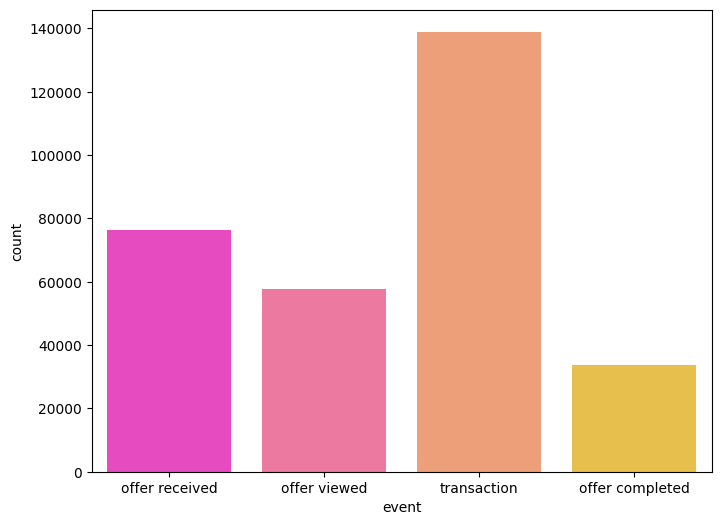

In [112]:
plt.figure(figsize = (8,6))
sns.countplot(data=transcript, x ="event", palette="spring", order = transcript.)
plt.show() # 그럼 얘네는 비율로 봐야 하는 것 같은데

In [150]:
def get_transaction(x):
  if x == 'transaction': return 1
  else: return 0

transcript['transaction'] = transcript.event.apply(lambda x: get_transaction(x))
# transcript.transaction

In [120]:
transcript.groupby('transaction')['event'].count()

transaction
0    167581
1    138953
Name: event, dtype: int64

In [158]:
# 퍼널 준비
not_transaction = transcript[transcript['transaction'] == 0]
# cnts = not_transaction['event'].count()
transaction_cnts = transcript[transcript['transaction'] == 1].event.count()


temp_df = not_transaction.groupby('event').agg(cnts = ('event', 'count')).reset_index()
temp_df['cnts'] += transaction_cnts

temp_df.sort_values(by='cnts', ascending= False, inplace=True)
temp_df = temp_df.reset_index(drop=True)
temp_df.loc[3] = ['transaction', transaction_cnts]

temp_df

,event,cnts
0,offer received,215230
1,offer viewed,196678
2,offer completed,172532
3,transaction,138953


In [161]:
# 퍼널로 그려보기
import plotly.express as px

fig = px.funnel_area(names = temp_df['event'], values =temp_df['cnts'])
fig.show()

# 출처: https://plotly.com/python/funnel-charts/

# 보류

In [114]:
pd.pivot_table(data=transcript, index="event", values="time")

,time
event,
offer completed,401.052801
offer received,332.579519
offer viewed,354.290515
transaction,381.584334


## 3.2 time에 대한 분석

In [166]:
temp = sorted(transcript.time.value_counts()[:6].index)
print(temp)

for i in range(len(temp)-1):
  print(temp[i+1] - temp[i], end = " ")

[0, 168, 336, 408, 504, 576]
168 168 72 96 72 

In [163]:
transcript.time.value_counts()

408    17030
576    17015
504    16822
336    16302
168    16150
       ...  
318      940
330      938
156      914
162      910
150      894
Name: time, Length: 120, dtype: int64

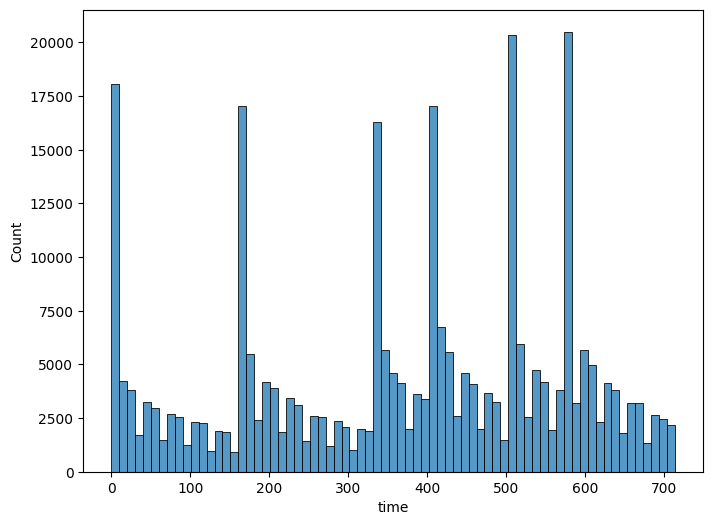

In [162]:
plt.figure(figsize = (8, 6))
sns.histplot(data=transcript, x="time")
plt.show()



In [164]:
transcript.head() # 그렇다면 value에서 offer id를 뽑아낸 뒤 grouping해야할 것 같다

,person,event,value,time,transaction
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,0


In [169]:
temp_df = transcript.loc[transcript.time.isin(temp), :]
temp_df

,person,event,value,time,transaction
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,0
...,...,...,...,...,...
262132,08eb126ad33f447ca3ad076482445c05,transaction,{'amount': 16.93},576,1
262133,1b4df4b48bf64727a4c445909aea1251,offer viewed,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},576,0
262134,ff737c250d2343729ade04c4f6eb1001,transaction,{'amount': 4.78},576,1
262135,400d0536e8794cbb855b0d882d67cbda,offer viewed,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},576,0


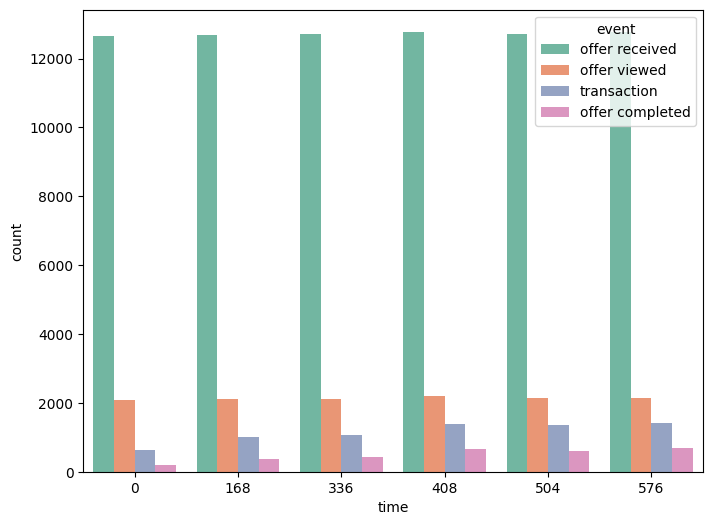

In [172]:
plt.figure(figsize = (8, 6))

# sns.countplot(data=temp_df, x="event", palette="Set2", hue ="time")
sns.countplot(data=temp_df, x="time", palette="Set2", hue ="event")
plt.show()

# _3. Portfolio

#(Advanced, optional) value에 대한 분석

In [ ]:
# str로 되어있는 데이터를 dictionary로 변환
transcript.value = transcript.value.apply(lambda x:eval(x))
transcript

In [ ]:
list(transcript.value[0].keys())[0]

In [ ]:
# event에 따른 value의 차이 확인
transcript["value_key"] = transcript.value.apply(lambda x:list(x.keys())[0])
transcript["value_value"] = transcript.value.apply(lambda x:list(x.values())[0])
transcript

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=transcript, x="value_key")
plt.show()

In [ ]:
transcript.value_value.value_counts()

In [ ]:
temp = transcript.loc[transcript.value_key != "amount", "value_value"]
temp_df = pd.DataFrame({"id" : temp.values})
temp_df

In [ ]:
temp.value_counts()

In [ ]:
temp_portfolio = pd.merge(temp_df, portfolio, how="left", on="id")
temp_portfolio

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=temp_portfolio, x="channels", palette="Set2")
plt.show()